# OMPHEMETSE MANGOPE
Student No: 201532614   
Advanced Machine Learning  
Assignment 5

In [185]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import distributions as dist
from scipy.stats import norm
from sklearn.preprocessing import scale

# Generating data

In [186]:
n = 100 # number of observations
x = dist.uniform(0, 20).rvs(n) 
x = x[np.argsort(x)]
y1_true = 4 + 0.5 * x
y_obs = y1_true + dist.norm(0, 0.5).rvs(n) 



X = np.c_[np.ones(n), x] # Design matrix 

# Maximum Likelihood Estimates for $\theta_{0}$ and $\theta_{1}$

In [187]:
θ_MLE = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs)

# Maximum Likelihood Estimate $\sigma^{2}$

In [188]:
var_MLE = (1/n)*(y_obs - X.dot(θ_MLE).T.dot(y_obs - X.dot(θ_MLE)))

# Generating data from a Gaussian distribution

In [189]:
μ_MLE = X.dot(θ_MLE) # Mean

μ_MLE = scale(μ_MLE)
var_MLE = scale(var_MLE)
X = scale(x)

y_pred = dist.norm.pdf(X,μ_MLE,var_MLE) # generating data from a Gaussian distribution
y_pred = scale(y_pred)

# Plot of generated data and train data

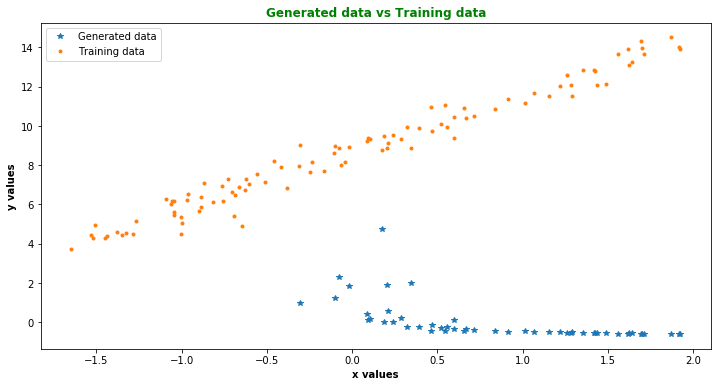

In [202]:
plt.figure(figsize=(12,6))
plt.plot(X,y_pred,'*',label='Generated data')
plt.plot(X,y_obs,'.',label='Training data')
plt.title('Generated data vs Training data',color='g', fontweight='bold')
plt.xlabel('x values', fontweight='bold')
plt.ylabel('y values', fontweight='bold')
plt.legend()

# Generating data from a uniform distribution

In [191]:
y_test = dist.uniform(20,25).rvs(n)